COMPREHENSIVE MODEL ANALYSIS

1. OVERALL PERFORMANCE RANKING:
----------------------------------------
1. vgg16_transfer: 0.9297 accuracy
2. baseline_cnn: 0.8594 accuracy
3. resnet50_transfer: 0.6953 accuracy

2. DETAILED METRICS COMPARISON:
----------------------------------------
Test Accuracy: vgg16_transfer (0.9297)
Macro Avg F1-Score: vgg16_transfer (0.9301)
Weighted Avg F1-Score: vgg16_transfer (0.9298)

3. PER-CLASS PERFORMANCE:
----------------------------------------
angular_leaf_spot: vgg16_transfer (0.9176 F1-score)
bean_rust: vgg16_transfer (0.8966 F1-score)
healthy: vgg16_transfer (0.9762 F1-score)


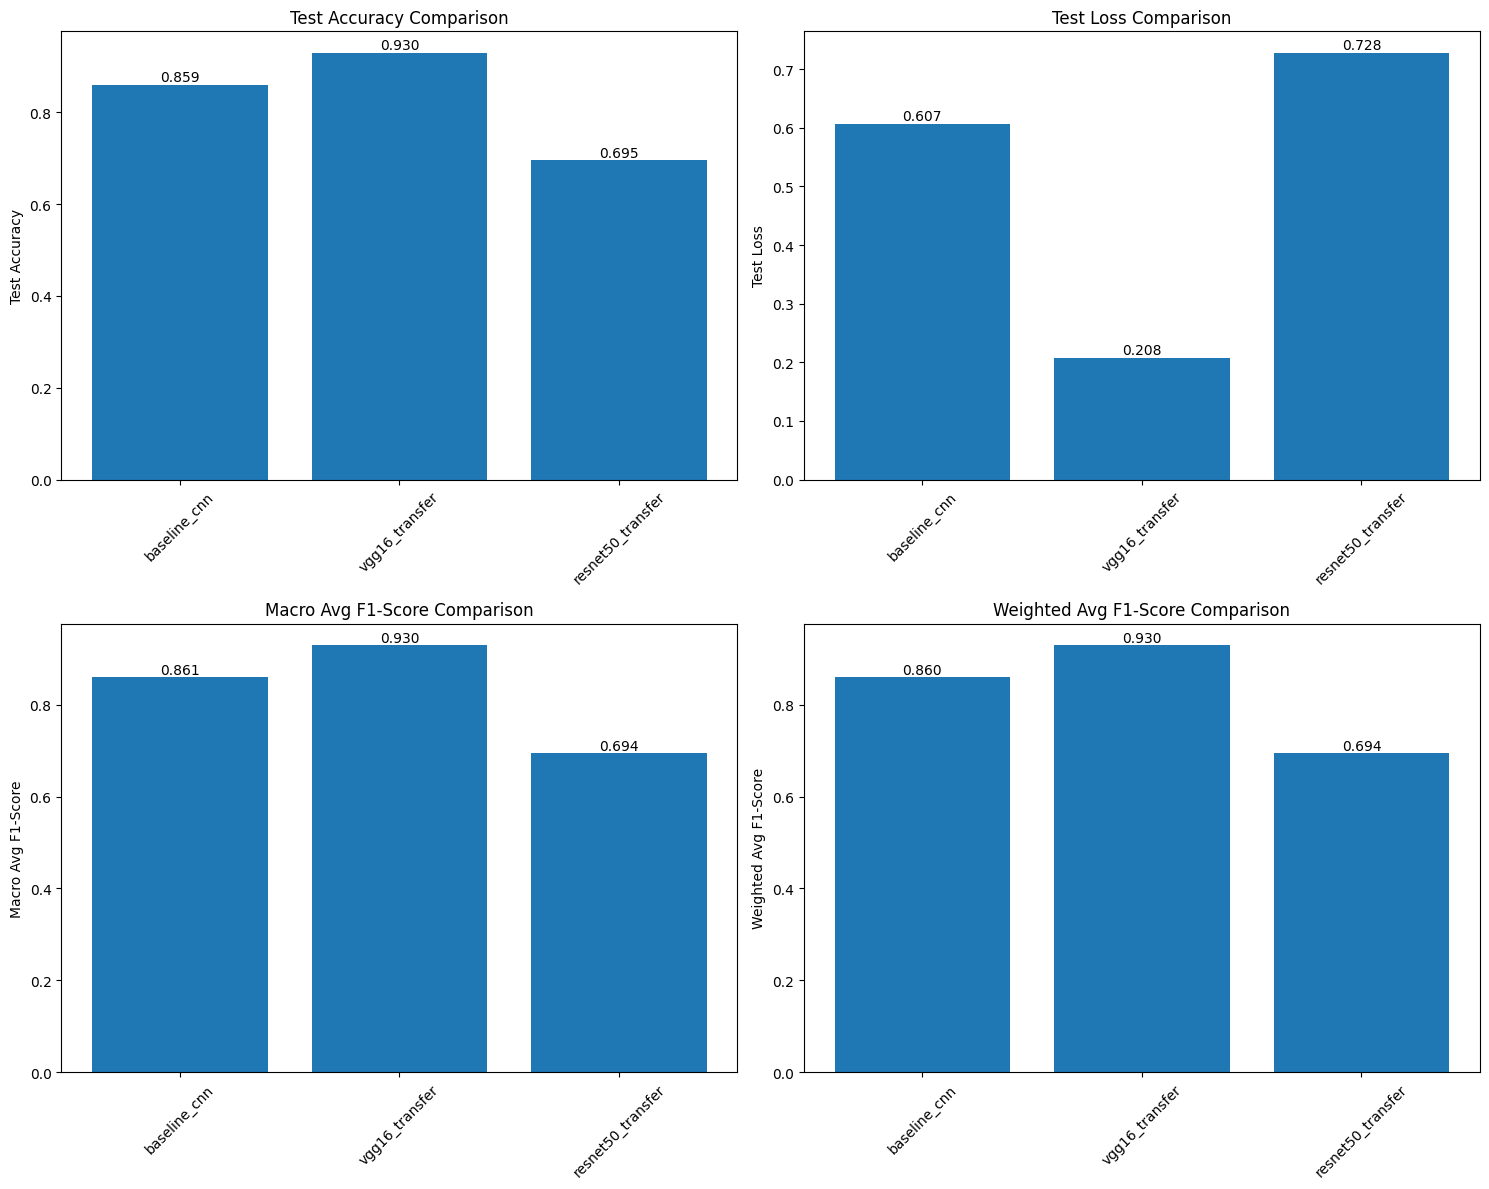


4. PERFORMANCE SUMMARY:
----------------------------------------
Best overall model: vgg16_transfer
Accuracy range: 0.6953 - 0.9297
Average accuracy: 0.8281
Improvement from worst to best: 33.71%


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def analyze_model_performance():
    try:
        df = pd.read_csv('model_comparison.csv')
    except FileNotFoundError:
        print("model_comparison.csv not found. Run transfer_learning_bean_classifier.py first.")
        return

    print("="*80)
    print("COMPREHENSIVE MODEL ANALYSIS")
    print("="*80)

    print("\n1. OVERALL PERFORMANCE RANKING:")
    print("-" * 40)
    ranking = df.sort_values('Test Accuracy', ascending=False)
    for i, (_, row) in enumerate(ranking.iterrows(), 1):
        print(f"{i}. {row['Model']}: {row['Test Accuracy']:.4f} accuracy")

    print("\n2. DETAILED METRICS COMPARISON:")
    print("-" * 40)
    metrics = ['Test Accuracy', 'Macro Avg F1-Score', 'Weighted Avg F1-Score']
    for metric in metrics:
        best_model = df.loc[df[metric].idxmax(), 'Model']
        best_value = df[metric].max()
        print(f"{metric}: {best_model} ({best_value:.4f})")

    print("\n3. PER-CLASS PERFORMANCE:")
    print("-" * 40)
    class_names = ['angular_leaf_spot', 'bean_rust', 'healthy']

    for class_name in class_names:
        f1_col = f'{class_name} F1-Score'
        if f1_col in df.columns:
            best_model = df.loc[df[f1_col].idxmax(), 'Model']
            best_value = df[f1_col].max()
            print(f"{class_name}: {best_model} ({best_value:.4f} F1-score)")

    fig, axes = plt.subplots(2, 2, figsize=(15, 12))

    metrics_to_plot = ['Test Accuracy', 'Test Loss', 'Macro Avg F1-Score', 'Weighted Avg F1-Score']

    for i, metric in enumerate(metrics_to_plot):
        ax = axes[i//2, i%2]
        bars = ax.bar(df['Model'], df[metric])
        ax.set_title(f'{metric} Comparison')
        ax.set_ylabel(metric)
        ax.tick_params(axis='x', rotation=45)

        for bar, value in zip(bars, df[metric]):
            ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.001,
                   f'{value:.3f}', ha='center', va='bottom')

    plt.tight_layout()
    plt.savefig('detailed_model_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()

    print(f"\n4. PERFORMANCE SUMMARY:")
    print("-" * 40)
    print(f"Best overall model: {ranking.iloc[0]['Model']}")
    print(f"Accuracy range: {df['Test Accuracy'].min():.4f} - {df['Test Accuracy'].max():.4f}")
    print(f"Average accuracy: {df['Test Accuracy'].mean():.4f}")

    improvement = (df['Test Accuracy'].max() - df['Test Accuracy'].min()) / df['Test Accuracy'].min() * 100
    print(f"Improvement from worst to best: {improvement:.2f}%")

if __name__ == "__main__":
    analyze_model_performance()